# Script to load particle data and reduce it to the North Atlantic

In [139]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
from datetime import datetime
from mpl_toolkits.basemap import Basemap

## Drifter data

In [140]:
datafiles = []
datafiles.append('../trajectory_data/drifters_6h_200318/buoydata_1_5000.dat')
datafiles.append('../trajectory_data/drifters_6h_200318/buoydata_5001_10000.dat')
datafiles.append('../trajectory_data/drifters_6h_200318/buoydata_10001_15000.dat')
datafiles.append('../trajectory_data/drifters_6h_200318/buoydata_15001_sep19.dat')

d =  np.loadtxt(datafiles[0])
ID = d[:,0]
month = d[:,1]
day = d[:,2]//1
hour = (d[:,2]-d[:,2]//1)*24
year = d[:,3]
TIME = np.array([datetime(int(year[i]), int(month[i]), int(day[i]), int(hour[i])).timestamp() for i in range(len(month))])
LAT = d[:,4]
LON = d[:,5]
print('file 1 loaded')

for df in datafiles[1:]:
    print(df)
    d =  np.loadtxt(df)
    ID = np.append(ID, d[:,0])
    month = d[:,1]
    day = d[:,2]//1
    hour = (d[:,2]-d[:,2]//1)*24
    year = d[:,3]
    time = np.array([datetime(int(year[i]), int(month[i]), int(day[i]), int(hour[i])).timestamp() for i in range(len(month))])
    TIME = np.append(TIME, time)
    LAT = np.append(LAT, d[:,4])
    LON = np.append(LON, d[:,5])

LON[LON>180.]-=360.

file 1 loaded
../trajectory_data/drifters_6h_200318/buoydata_5001_10000.dat
../trajectory_data/drifters_6h_200318/buoydata_10001_15000.dat
../trajectory_data/drifters_6h_200318/buoydata_15001_sep19.dat


## Plot a test trajectory

C:\Users\HP\anaconda3\envs\py3_3d_transition_matrix\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


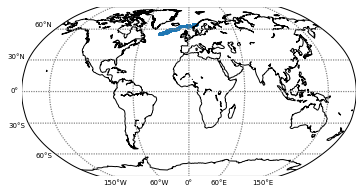

In [141]:
unique_ids = np.unique(ID)
i = unique_ids[5000]
lon = LON[ID == i]
lat = LAT[ID == i]
time = TIME[ID == i]
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawparallels([-60,-30,0,30,60], labels=[True, False, False, True], color='gray', linewidth=1.2, size=7)
m.drawmeridians([-150, -60, 0, 60, 150], labels=[False, False, False, True], color='gray', linewidth=1.2, size=7)
m.drawcoastlines()
xs, ys = m(lon, lat)
m.scatter(xs, ys, s=2)

## Select those drifters that start in North Atlantic

### Select initial coordinates

In [142]:
lons_initial = [LON[ID == i][0] for i in unique_ids]
lats_initial = [LAT[ID == i][0] for i in unique_ids]

### Plot initial drifter positions

C:\Users\HP\anaconda3\envs\py3_3d_transition_matrix\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.


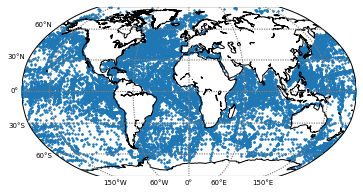

In [143]:
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawparallels([-60,-30,0,30,60], labels=[True, False, False, True], color='gray', linewidth=1.2, size=7)
m.drawmeridians([-150, -60, 0, 60, 150], labels=[False, False, False, True], color='gray', linewidth=1.2, size=7)
m.drawcoastlines()
xs, ys = m(lons_initial, lats_initial)
m.scatter(xs, ys, s=2)

### Select drifter IDs corresponding to North Atlantic

In [144]:
selection0 = [i for i in range(len(lons_initial)) if (lats_initial[i]>0) and (lats_initial[i]<80) and (lons_initial[i]>-100) and (lons_initial[i]<20)]

(lo0, la0) = (-5.49, 35.47)
(lo1, la1) = (8., 58.9)
a = (la1-la0)/(lo1-lo0)
selection1 = [i for i in range(len(lons_initial)) if ((lats_initial[i] > la0 + a * (lons_initial[i]-lo0) and lons_initial[i]>lo0)  or (lons_initial[i]<=lo0) or (lats_initial[i]<la0-10) or (lats_initial[i]>65))]
    
(lo0, la0) = (-103.5, 21.)
(lo1, la1) = (-75., 4)
a = (la1-la0)/(lo1-lo0)
selection2 = [i for i in range(len(lons_initial)) if ((lats_initial[i] > la0 + a * (lons_initial[i]-lo0) and lons_initial[i]>lo0)) or lons_initial[i]>-60.]
    
selection3 = [i for i in range(len(lons_initial)) if not ((lons_initial[i] <-84. and lats_initial[i] < 14.) or (lons_initial[i] <-90. and lats_initial[i] < 18.) or (lons_initial[i] <-76. and lats_initial[i] < 8.) or (lons_initial[i] <-78.2 and lats_initial[i] < 9.1 and lons_initial[i] > -80.6))]

selection = list(set.intersection(set(selection0), set(selection1), set(selection2), set(selection3)))

unique_ids_north_atlantic=unique_ids[selection]

### Plot initial positions of constrained drifters to check

C:\Users\HP\anaconda3\envs\py3_3d_transition_matrix\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


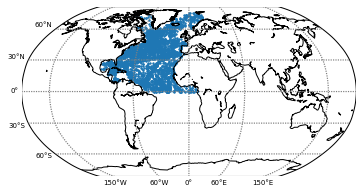

In [145]:
lons_initial_north_atlantic = [np.array(lons_initial)[unique_ids == i] for i in unique_ids_north_atlantic]
lats_initial_north_atlantic = [np.array(lats_initial)[unique_ids == i] for i in unique_ids_north_atlantic]

time = TIME[ID == i]
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawparallels([-60,-30,0,30,60], labels=[True, False, False, True], color='gray', linewidth=1.2, size=7)
m.drawmeridians([-150, -60, 0, 60, 150], labels=[False, False, False, True], color='gray', linewidth=1.2, size=7)
m.drawcoastlines()
xs, ys = m(lons_initial_north_atlantic, lats_initial_north_atlantic)
m.scatter(xs, ys, s=2)

### Constrain data and save

In [146]:
lons_north_atlantic = [LON[ID == i] for i in unique_ids_north_atlantic]
lats_north_atlantic = [LAT[ID == i] for i in unique_ids_north_atlantic]
time_north_atlantic = [TIME[ID == i] for i in unique_ids_north_atlantic]
assert(len(time_north_atlantic)==len(lons_north_atlantic))
assert(len(lats_north_atlantic)==len(lons_north_atlantic))
np.savez('drifterdata_north_atlantic', lon = lons_north_atlantic, lat = lats_north_atlantic, time = time_north_atlantic, ID = unique_ids_north_atlantic)

### Check if saved data is correct

C:\Users\HP\anaconda3\envs\py3_3d_transition_matrix\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


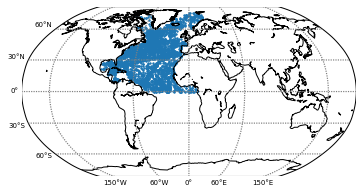

In [147]:
data = np.load('drifterdata_north_atlantic.npz', allow_pickle=True)
lon = data['lon']
lat = data['lat']

lon0 = [lon[i][0] for i in range(len(lon))]
lat0 = [lat[i][0] for i in range(len(lon))]

m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawparallels([-60,-30,0,30,60], labels=[True, False, False, True], color='gray', linewidth=1.2, size=7)
m.drawmeridians([-150, -60, 0, 60, 150], labels=[False, False, False, True], color='gray', linewidth=1.2, size=7)
m.drawcoastlines()
xs, ys = m(lon0, lat0)
m.scatter(xs, ys, s=2)

5270

## Virtual trajectories

In [2]:
i_pos = 10
pfile = './surface_data_global/SubSurf_y2000_m1_d5_simdays3650_layer0_pos' + str(i_pos) + '.nc'
pdata = Dataset(pfile,'r')
particle_lats = pdata['lat'][:,:]
particle_lons = pdata['lon'][:,:]

for i_pos in range(11,26):
    print('Loading ', i_pos)
    pfile = './surface_data_global/SubSurf_y2000_m1_d5_simdays3650_layer0_pos' + str(i_pos) + '.nc'
    pdata = Dataset(pfile,'r')
    particle_lats = np.vstack((particle_lats, pdata['lat'][:,:]))
    particle_lons = np.vstack((particle_lons, pdata['lon'][:,:]))

particle_lons[particle_lons>180.]-=360.

Loading  11
Loading  12
Loading  13
Loading  14
Loading  15
Loading  16
Loading  17
Loading  18
Loading  19
Loading  20
Loading  21
Loading  22
Loading  23
Loading  24
Loading  25


C:\Users\HP\.conda\envs\py3_drifters\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  


### Plot initial particles (check that North Atlantic is covered)

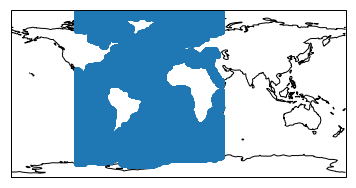

In [3]:
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawparallels([-60,-30,0,30,60], labels=[True, False, False, True], color='gray', linewidth=1.2, size=7)
m.drawmeridians([-150, -60, 0, 60, 150], labels=[False, False, False, True], color='gray', linewidth=1.2, size=7)
m.drawcoastlines()
xs, ys = m(particle_lons[:,0], particle_lats[:,0])
m.scatter(xs, ys, s=2)

### Constrain particles based on their initial position

In [5]:
lons_initial = particle_lons[:,0]
lats_initial = particle_lats[:,0]

selection0 = [i for i in range(len(lons_initial)) if (lats_initial[i]>0) and (lats_initial[i]<80) and (lons_initial[i]>-100) and (lons_initial[i]<20)]

(lo0, la0) = (-5.49, 35.47)
(lo1, la1) = (8., 58.9)
a = (la1-la0)/(lo1-lo0)
selection1 = [i for i in range(len(lons_initial)) if ((lats_initial[i] > la0 + a * (lons_initial[i]-lo0) and lons_initial[i]>lo0)  or (lons_initial[i]<=lo0) or (lats_initial[i]<la0-10) or (lats_initial[i]>65))]
    
(lo0, la0) = (-103.5, 21.)
(lo1, la1) = (-75., 4)
a = (la1-la0)/(lo1-lo0)
selection2 = [i for i in range(len(lons_initial)) if ((lats_initial[i] > la0 + a * (lons_initial[i]-lo0) and lons_initial[i]>lo0)) or lons_initial[i]>-60.]
    
selection3 = [i for i in range(len(lons_initial)) if not ((lons_initial[i] <-84. and lats_initial[i] < 14.) or (lons_initial[i] <-90. and lats_initial[i] < 18.) or (lons_initial[i] <-76. and lats_initial[i] < 8.) or (lons_initial[i] <-78.2 and lats_initial[i] < 9.1 and lons_initial[i] > -80.6))]

selection = list(set.intersection(set(selection0), set(selection1), set(selection2), set(selection3)))

lons_northatlantic=particle_lons[selection]
lats_northatlantic=particle_lats[selection]

### Plot initial position of particles starting in the North Atlantic

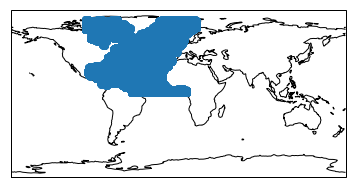

In [6]:
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawparallels([-60,-30,0,30,60], labels=[True, False, False, True], color='gray', linewidth=1.2, size=7)
m.drawmeridians([-150, -60, 0, 60, 150], labels=[False, False, False, True], color='gray', linewidth=1.2, size=7)
m.drawcoastlines()
xs, ys = m(lons_northatlantic[:,0], lats_northatlantic[:,0])
m.scatter(xs, ys, s=2)

In [7]:
np.savez('north_atlantic_trajectories', lons = lons_northatlantic, lats = lats_northatlantic)

### Check if saved data is correct

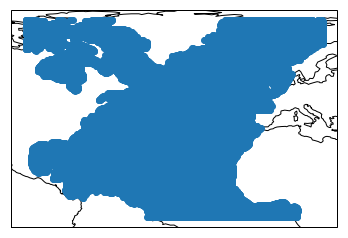

In [5]:
data = np.load('north_atlantic_trajectories.npz')
lons = data['lons']
lats = data['lats']
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.plot(lons[:,0], lats[:,0], 'o')
plt.show()